# Setup, run once

In [1]:
import sys, os
os.chdir('../')
import numpy as np
import pandas as pd
import importlib # for debugging, not necessarily needed
import re # for debugging, not necessarily needed
import matplotlib # for debugging, not necessarily needed
import matplotlib.pyplot as plt # for plotting
import matplotlib.patches as mpatches # for plotting
from scipy.optimize import minimize
import scipy

# Usage


In this example section, we will demonstrate the use of Fiteft, with a specific result being ATLAS-CONF-2020-053.<br>
First, we `import` the necessary libraries: `numpy`, `pandas`, and `Fiteft`, and initialize a fiteft object.



In [2]:
import numpy as np
import pandas as pd
import sys # for debugging, not necessarily needed
import importlib # for debugging, not necessarily needed
import Fiteft as Fiteft # Colab specific, if not using colab, use: import Fiteft as Fiteft
f = Fiteft.fiteft()

Your input to the likelihood function is a DataFrame with at least one of these colums:
['c(3)Hq', 'c[1]HW-HB-HWB-HDD-uW-uB', 'c[2]HW-HB-HWB-HDD-uW-uB', 'c[3]HW-HB-HWB-HDD-uW-uB', 'c[1]Hu-Hd-Hq(1)', 'c[1]Hl(1)-He', 'c[1]Hl(3)-ll0', 'c[1]HG-uG-uH-top', 'c[2]HG-uG-uH-top', 'c[3]HG-uG-uH-top']


We can start calculating the likelihood with the **c'** vector values as follows $(0,0,0,0,0,0,0,0,0,0)$, with the values arranged in the order written above. We will begin by initializing a vector named `arr` with the shape (1,10)

In [4]:
arr = np.zeros((1,10))
arr

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

Next, we will use `arr` as an argument for the function `fiteft.l()`

In [5]:
f.l(arr)

array([[[39.28929247]]])

We will find the minimum of the above likelihood function with the help of the minimize function from the `minimize` function from the `scipy`.  library. One important point about the input of the `minimize()` function is:

`fun(x)` is a function that returns a value of type `float`, and the input value is a numpy array with shape `x(n,)` where n is the number of parameters. Our likelihood function has the form `x(1,n) -> fx(1,1,1)`, so we need to perform the following transformation:

 $\underbrace{\texttt{x(n,)->}\overbrace{\texttt{x(1,n)->fx(1,1,1)}}^{\texttt{fiteft.l}}\texttt{-> fx(float)}}_{\texttt{fun}}$

We do this by asigning `fun` through a `lambda` function as follows:

In [6]:
fun = lambda x: f.l(x.reshape(1,-1))[0,0,0]

To check, we will use an array with shape (10,)

In [7]:
arr = np.zeros(10)
arr.shape

(10,)

 then put it in `fun()` as argument. The wanted return value should be a number type `float`

In [8]:
fun(arr)

39.289292468722365

And so, we have defined a new function that uses an array with input shape (n,) and output as `float`. This result meets the conditions for the function of the `minimize` function. Now we can start finding the minimum using the `minimize` function with the starting point being $\boldsymbol{0}$ (an array where all parameters are zero).

In [9]:
minimize(fun = fun, x0 = np.zeros(10))

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 27.391502321886623
        x: [-5.262e-02 -1.140e-02  2.144e-01 -3.808e+00 -6.253e-01
             1.838e+01 -1.392e+00  4.151e-03  6.644e-02  8.962e-01]
      nit: 33
      jac: [ 1.192e-06  4.029e-05  9.060e-06  1.001e-05 -4.768e-07
             2.146e-06 -3.576e-06  6.328e-04 -2.384e-07 -3.576e-06]
 hess_inv: [[ 1.445e-03  1.219e-04 ...  2.940e-03 -1.642e-03]
            [ 1.219e-04  7.498e-05 ...  9.721e-04  1.449e-03]
            ...
            [ 2.940e-03  9.721e-04 ...  4.967e-02  2.122e-02]
            [-1.642e-03  1.449e-03 ...  2.122e-02  4.947e-01]]
     nfev: 462
     njev: 42

The returned result is `False`, which does not mean the result is incorrect, but rather because the derivative of the likelihood function has not reached a sufficiently small level to be considered accurate. By default, this level is set to $10^{-6}$. We will change this threshold to a larger value to make it easier for the derivative condition to be satisfied. Here, we will use the argument `options = {'gtol': 1e-3}`

In [10]:
res = minimize(fun = fun, x0 = np.zeros(10), options = {'gtol':1e-3})
res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 27.391502321886623
        x: [-5.262e-02 -1.140e-02  2.144e-01 -3.808e+00 -6.253e-01
             1.838e+01 -1.392e+00  4.151e-03  6.644e-02  8.962e-01]
      nit: 32
      jac: [ 1.192e-06  3.958e-05  9.298e-06  1.049e-05 -7.153e-07
             2.384e-06 -3.576e-06  6.330e-04 -4.768e-07 -4.053e-06]
 hess_inv: [[ 2.079e-03 -2.024e-05 ...  1.680e-03  1.511e-03]
            [-2.024e-05  1.059e-04 ...  1.246e-03  8.496e-04]
            ...
            [ 1.680e-03  1.246e-03 ...  5.210e-02  1.578e-02]
            [ 1.511e-03  8.496e-04 ...  1.578e-02  5.023e-01]]
     nfev: 407
     njev: 37

The returned result is successful, indicating that the `minimize` function has found the minimum value of the likelihood function to be $\mathcal{L}(\hat{\boldsymbol{c}})=27.3915$. The corresponding optimal parameters $\hat{\boldsymbol{c}}$ are stored in `res.x`, the gradient $\frac{\partial \mathcal{L}}{\partial \boldsymbol{c}'^\top}$ is stored in `res.jac`, and the inverse Hessian $\frac{\partial^2 \mathcal{L}}{\partial \boldsymbol{c}' \partial \boldsymbol{c}'^\top}$ is stored in `res.hess_inv`. We will measure the time taken to perform this operation using the following command

In [11]:
%%timeit
minimize(fun = fun, x0 = np.zeros(10), options = {'gtol':1e-3})

3.05 s ± 123 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


The time taken to find this minimum is approximately 3.05 seconds starting with all parameters at value 0.

We can significantly improve the minimization function by incorporating the derivative calculation of `fiteft` into it. I'll name this function `fun2`, which takes an input array of shape $(10,)$ and returns an output array of shape $(10,)$, set up similarly to the likelihood function as described earlier. The `fun2` function will have an algorithm structured as follows:

 $\underbrace{\texttt{x(n,)->}\overbrace{\texttt{x(1,n)->fx(1,1,n)}}^{\texttt{fiteft.dl}}\texttt{-> fx(n,)}}_{\texttt{fun2}}$


In [12]:
fun2 = lambda x: f.dl(x.reshape(1,-1))[0,0]

Using this function with an argument as an array of shape $(10,)$, we have:

In [13]:
arr = np.zeros(10)
fun2(arr)

array([ 1.74947677e+01,  1.19368262e+03,  4.69186152e-01,  4.96926121e+00,
       -5.59564136e+00,  2.77503991e+00, -1.56736581e+01,  1.22274234e+03,
       -8.44857583e+00, -8.51474262e+00])

To use the `minimize` function again, but this time incorporating the derivative function `fun2` as an argument using `jac=fun2`, where jac stands for Jacobian, you can proceed with the following code

In [14]:
res = minimize(fun = fun, x0 = np.zeros(10), jac = fun2, options = {'gtol':1e-3})
res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 27.39150232202947
        x: [-5.262e-02 -1.140e-02  2.144e-01 -3.808e+00 -6.253e-01
             1.838e+01 -1.392e+00  4.151e-03  6.644e-02  8.962e-01]
      nit: 32
      jac: [-4.769e-07  2.003e-05  5.722e-06  5.007e-06  2.384e-07
            -2.384e-07 -1.431e-06  3.565e-04 -2.384e-07 -2.384e-06]
 hess_inv: [[ 2.090e-03 -2.388e-05 ...  1.650e-03  1.484e-03]
            [-2.388e-05  1.065e-04 ...  1.250e-03  8.502e-04]
            ...
            [ 1.650e-03  1.250e-03 ...  5.212e-02  1.573e-02]
            [ 1.484e-03  8.502e-04 ...  1.573e-02  5.022e-01]]
     nfev: 37
     njev: 37

In order to see the improvement, we measure the time to run the minimization process as follow

In [15]:
%%timeit
minimize(fun = fun, x0 = np.zeros(10), jac = fun2, options = {'gtol':1e-3})

830 ms ± 42.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


And the time to find the minimum has been significantly improved, from 3 seconds (can vary depends on the machine) down to 0.83 seconds (can vary depends on the machine). While we are currently calculating the minimum using numerical derivatives, by leveraging the power of the numpy library, we have reduced the computation time by more than three times. If we use the results from analytical derivatives, the computation time can be reduced even further. In the current version of Fiteft, there is no function for calculating analytical derivatives, but this feature will be available in future improvements.

## profiling

After finding $\hat{\boldsymbol{c}'}$, we can start calculating the profile likelihood $\mathcal{L}(c'_i,\hat{\overline{\boldsymbol{c}'}}_i)$. We will need to write a new function to use in the minimize function. This function will take a array of shape (m-1,) where m-1 is the number of parameters in $\overline{\boldsymbol{c}'}_i$ and return a `float ` result:

 $\underbrace{\texttt{x(n,)->}\overbrace{\texttt{x(1,n)->fx(1,1,n)}}^{\texttt{fiteft.l\_profile}}\texttt{-> fx(float)}}_{\texttt{fun3}}$

We will do this using a `lambda` function and name it `fun3`.

This function will take an argument that is an array of shape (9,) instead of (10,), representing the parameters other than the one under consideration $c_i$.

Here is an example of the function $\mathcal{L}(c'_i=0,\overline{\boldsymbol{c}'}_i)$ with $i$ being `c(3)Hq`. We will use an array of zeros with shape $(9,)$ as the argument for the function `fun3`, with the expected result being a scalar quantity of type `float`.


Example 1

In [ ]:
fun3 = lambda x: f.l_profile(x.reshape(1,-1), loc='c(3)Hq', val=0)[0,0,0]
arr = np.zeros(9)
fun3(arr)

39.289292468722365

Example 2

In [ ]:
fun3 = lambda x: f.l_profile(x.reshape(1,-1), loc=0, val=0)[0,0,0]
arr = np.zeros(9)
fun3(arr)

39.289292468722365

Both examples return the same result, so the user can choose either. Next, we will use the function `fun3` as an argument for the `minimize` function with the following command

In [ ]:
res = minimize(fun = fun3, x0 = np.zeros(9), options = {'gtol' : 1e-2})
res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 28.060463368519766
        x: [-1.202e-02  5.068e-01 -3.097e+00 -4.279e-01  1.282e+01
            -1.250e+00  3.262e-03  1.057e-01  9.461e-01]
      nit: 26
      jac: [-1.945e-03 -5.174e-05 -3.052e-05 -2.861e-06 -5.960e-06
             4.983e-05 -4.318e-04  7.153e-07  1.836e-05]
 hess_inv: [[ 9.790e-05 -1.540e-03 ...  1.178e-03  2.458e-04]
            [-1.540e-03  5.395e-02 ... -9.581e-03  1.294e-02]
            ...
            [ 1.178e-03 -9.581e-03 ...  4.826e-02  2.982e-03]
            [ 2.458e-04  1.294e-02 ...  2.982e-03  3.895e-01]]
     nfev: 300
     njev: 30

We see that the `minimize` function, starting with all parameters at value 0 and fixing the parameter `c(3)Hq` at value 0, returns the minimum value of the likelihood function $\mathcal{L}(c'_i=0,\hat{\overline{\boldsymbol{c}'}_i})=28.06$, with the value $\hat{\overline{\boldsymbol{c}}_i}$ is in `res.x`, $\frac{\partial \mathcal{L}(c_i=0)}{\partial \overline{ \boldsymbol{c}'}_i^\top}$ is in `res.jac`, $\frac{\partial^2 \mathcal{L}}{\partial \overline{ \boldsymbol{c}'}_i \partial \overline{ \boldsymbol{c}'}_i^\top}$ is in `res.hess_inv`.

The time taken to perform this task is:

In [ ]:
%%timeit
res = minimize(fun = fun3, x0 = np.zeros(9), options = {'gtol' : 1e-2})

10.6 s ± 1.59 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


We see that the time taken to find the minimum is about 11 seconds. We can improve this task by providing the minimization function with an argument that is a function to compute the minimum, using the function `fiteft.dl_profile()`. This minimization function has the following characteristics:

 $\underbrace{\texttt{x(n,)->}\overbrace{\texttt{x(1,n)->fx(1,1,n)}}^{\texttt{fiteft.dl\_profile}}\texttt{-> fx(n,)}}_{\texttt{fun4}}$

Below is how to setup `fun4`

In [ ]:
fun4 = lambda x: f.dl_profile(x.reshape(1,-1), loc='c(3)Hq', val=0)[0,0]
arr = np.zeros(9)
fun4(arr)

array([ 1.19368262e+03,  4.69186152e-01,  4.96926121e+00, -5.59564136e+00,
        2.77503991e+00, -1.56736581e+01,  1.22274234e+03, -8.44857583e+00,
       -8.51474262e+00])

In [ ]:
fun4 = lambda x: f.dl_profile(x.reshape(1,-1), loc= 0, val=0)[0,0]
arr = np.zeros(9)
fun4(arr)

array([ 1.19368262e+03,  4.69186152e-01,  4.96926121e+00, -5.59564136e+00,
        2.77503991e+00, -1.56736581e+01,  1.22274234e+03, -8.44857583e+00,
       -8.51474262e+00])

We use `fun4` as an argument for `minimize` function

In [ ]:
res = minimize(fun = fun3, x0 = np.zeros(9), jac = fun4 , options = {'gtol' : 1e-2})
res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 28.060463368585722
        x: [-1.202e-02  5.068e-01 -3.097e+00 -4.279e-01  1.282e+01
            -1.250e+00  3.262e-03  1.057e-01  9.461e-01]
      nit: 26
      jac: [-1.757e-03 -4.912e-05 -3.076e-05 -3.100e-06 -5.961e-06
             4.697e-05 -2.737e-04  9.537e-07  1.764e-05]
 hess_inv: [[ 9.749e-05 -1.536e-03 ...  1.169e-03  2.606e-04]
            [-1.536e-03  5.392e-02 ... -9.473e-03  1.268e-02]
            ...
            [ 1.169e-03 -9.473e-03 ...  4.809e-02  3.115e-03]
            [ 2.606e-04  1.268e-02 ...  3.115e-03  3.902e-01]]
     nfev: 30
     njev: 30

Time to perform this task is:

In [ ]:
%%timeit
res = minimize(fun = fun3, x0 = np.zeros(9), jac = fun4 , options = {'gtol' : 1e-2})

2.51 s ± 573 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


We have thus reduced the computation time from 11 seconds to 2.5 seconds. We can see that providing a function to compute the gradient for the `minimize` function, while not affecting the result, significantly impacts the computation speed. We can also provide a function to compute the second-order derivative, and this will be improved in the next version, along with the formula for computing the analytic gradient.

## Determining confidence interval

Now we have all the necessary components to calculate the confidence interval for the likelihood function for any given parameter. We will scan through the values of the profile likelihood function $\mathcal{L}(c'_i,\hat{\overline{\boldsymbol{c}'}_i})$, with $c'_i$ ranging within a certain interval determined by

$|c_i| <\alpha\times \sqrt{\left[\frac{\partial^2 \mathcal{L}}{\partial \boldsymbol{c}' \partial \boldsymbol{c}'^\top}|_{\boldsymbol{c}'=\hat{\boldsymbol{c'}}}\right](i,i)}$ where $\alpha\in \mathcal{O}(1),$

In the case of a fully linear scenario, with $\alpha = 1$ he expression above exactly matches the **bằng khoảng tin cậy** $68\%$,. However, because our likelihood function contains nonlinear components, what we are assuming here is that the **kconfidence interval will not significantly differ** from the linear case. We will need to scan within such an interval to find the precise values for the confidence interval.


Here is an example of finding the scanning range for the parameter `c(3)Hq`.
First, we minimize the likelihood function and use the Hessian matrix to determine the scanning range for the parameter `c(3)Hq`. As before, we define the function `fun` to be used as an argument for the `minimize` function, and `fun2` as the function to compute derivatives:

In [ ]:
fun = lambda x: f.l(x.reshape(1,-1))[0,0,0]
fun2 = lambda x: f.dl(x.reshape(1,-1))[0,0]
res = minimize(fun = fun, x0 = np.zeros(10), jac = fun2, options ={'gtol': 1e-3})
res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 27.39150232202947
        x: [-5.262e-02 -1.140e-02  2.144e-01 -3.808e+00 -6.253e-01
             1.838e+01 -1.392e+00  4.151e-03  6.644e-02  8.962e-01]
      nit: 32
      jac: [-4.769e-07  2.003e-05  5.722e-06  5.007e-06  2.384e-07
            -2.384e-07 -1.431e-06  3.565e-04 -2.384e-07 -2.384e-06]
 hess_inv: [[ 2.090e-03 -2.388e-05 ...  1.650e-03  1.484e-03]
            [-2.388e-05  1.065e-04 ...  1.250e-03  8.502e-04]
            ...
            [ 1.650e-03  1.250e-03 ...  5.212e-02  1.573e-02]
            [ 1.484e-03  8.502e-04 ...  1.573e-02  5.022e-01]]
     nfev: 37
     njev: 37

The value $\left[\frac{\partial^2 \mathcal{L}}{\partial \boldsymbol{c}' \partial \boldsymbol{c}'^\top}|_{\boldsymbol{c}'=\hat{\boldsymbol{c'}}}\right][0,0]$ epresents the second derivative (Hessian) of the likelihood function with respect to the parameter `c(3)Hq` at the value $\hat{\boldsymbol{c}'}$, i.e., $\frac{\partial^2 \mathcal{L}}{\partial {c}_{(3)Hq}' \partial {c}_{(3)Hq}'^\top}|_{\boldsymbol{c}'=\hat{\boldsymbol{c'}}}=$ `res.hess_inv[0,0]`. And that value is

In [ ]:
res.hess_inv[0,0]

0.0020904827414526764

The scanning range for the parameter `c(3)Hq` will be $\alpha\sqrt{0.00209}<c_i<\alpha\sqrt{0.00209}$, and we choose $\alpha = 5$. We will begin scanning the values of `c(3)Hq` and compute the profile likelihood minimum. We will use the previous minimum point as the starting point for each subsequent search because we have enforced that profile likelihood minima satisfy: If two values $c_i'[1]$ and $c_i'[2]$ are close by, then the profiled nuissance parameters vectors $\hat{\overline{\boldsymbol{c}'_i}[1]}$ and $\hat{\overline{\boldsymbol{c}'_i}[2]}$ will also be closeby 

$c'_i[0] -c_i[1]\approx 0 \Rightarrow \Big|\hat{\overline{\boldsymbol{c}'_i}[1]} -\hat{\overline{\boldsymbol{c}'_i}[2]}\Big|\approx 0$

We will implement the following algorithm

1. Set $\boldsymbol{a= \hat{\overline{\boldsymbol{c}_i'}}(c_i'=\hat{c_i'})}$, $b=\hat{c_i'}$
2. Increase $b = b +\Delta $
3. Set starting point of the gradient decent to $\boldsymbol{a}$. Find profiled nuissance parameters vectors $\hat{\overline{\boldsymbol{c}_i'}}(c_i'=b)$ by minimizing $\frac{\partial^2 \mathcal{L}(c_i' = b)}{\partial \overline{\boldsymbol{c}_i'} \partial \overline{\boldsymbol{c}_i'}^\top}$.
4. Update the starting value $a=\boldsymbol{\hat{\overline{\boldsymbol{c}_i'}}}(c_i'=b)$
5. Return to step 2.

We will perform a similar procedure for the left half by reversing step 2: $b = b -\Delta$

In [ ]:
a = np.delete(res.x, f.C2.get_loc('c(3)Hq'))
b0 = res.x[f.C2.get_loc('c(3)Hq')]
bmax =  5 * res.hess_inv[f.C2.get_loc('c(3)Hq'),f.C2.get_loc('c(3)Hq')]**0.5
ls = []
for b in np.linspace(b0, b0 + bmax, 10):
  fun3 = lambda x: f.l_profile(x.reshape(1,-1), loc='c(3)Hq', val=b)[0,0,0]
  fun4 = lambda x: f.dl_profile(x.reshape(1,-1), loc='c(3)Hq', val=b)[0,0]
  res2 = minimize(fun = fun3, x0 = a, jac = fun4, options = {'gtol':1e-3})
  a = res2.x
  ls.append([b, res2.fun])

If we plot the results, we get the following figure

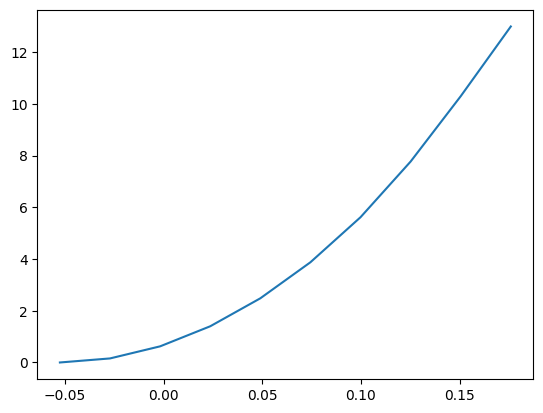

In [ ]:
fig, ax = plt.subplots()
ax.plot( np.array(ls)[:,0], np.array(ls)[:,1]-np.array(ls)[:,1].min())

We repeat the same procedure for the left half of the plot and add the results to the list `ls`

In [ ]:
a = np.delete(res.x, f.C2.get_loc('c(3)Hq'))
b0 = res.x[f.C2.get_loc('c(3)Hq')]
bmax =  5 * res.hess_inv[f.C2.get_loc('c(3)Hq'),f.C2.get_loc('c(3)Hq')]**0.5
for b in np.linspace(b0, b0 - bmax, 10):
  fun3 = lambda x: f.l_profile(x.reshape(1,-1), loc='c(3)Hq', val=b)[0,0,0]
  fun4 = lambda x: f.dl_profile(x.reshape(1,-1), loc='c(3)Hq', val=b)[0,0]
  res2 = minimize(fun = fun3, x0 = a, jac = fun4, options = {'gtol':1e-3})
  a = res2.x
  ls.append([b, res2.fun])

To plot the figure for both halves, we obtain the profile likelihood function for `c(3)Hq`

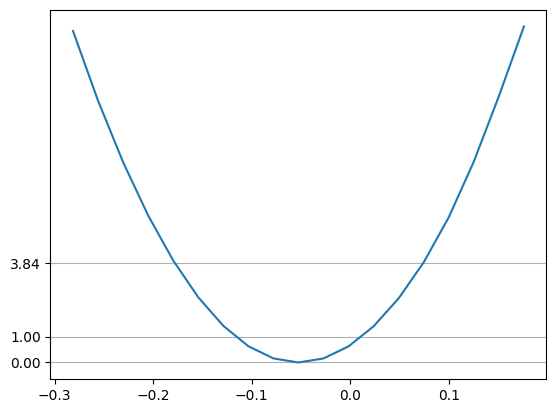

In [ ]:
fig, ax = plt.subplots()
df = pd.DataFrame(ls)
df = df.sort_values(0, axis=0)
ax.plot(df[0],df[1] - df[1].min())
ax.set_yticks([0,1,3.84], minor=False)
ax.yaxis.grid(True, which='major')